# Reports

## Load data

In [7]:
import pandas as pd

df = pd.read_excel('../data/processed/2024-01.xlsx', index_col=0, parse_dates=True)
df

,price,volume,cost
datetime,,,
2024-01-01 00:00:00,63.33,8744.9,553814.517
2024-01-01 01:00:00,50.09,8671.4,434350.426
...,...,...,...
2024-01-31 22:00:00,85.00,12171.6,1034586.000
2024-01-31 23:00:00,77.52,10826.8,839293.536


## Descriptive statistics

In [8]:
df.describe().style

,price,volume,cost
count,744.000000,744.000000,744.000000
mean,74.100094,15939.247446,1164582.355187
std,27.921106,3756.225242,518957.249522
min,0.430000,8101.900000,7890.543000
25%,58.500000,13034.675000,827025.967500
50%,75.950000,15633.450000,1143475.784000
75%,92.682500,18707.625000,1412800.950250
max,168.350000,28691.400000,2729740.534000


## Plots

### Line variation plot

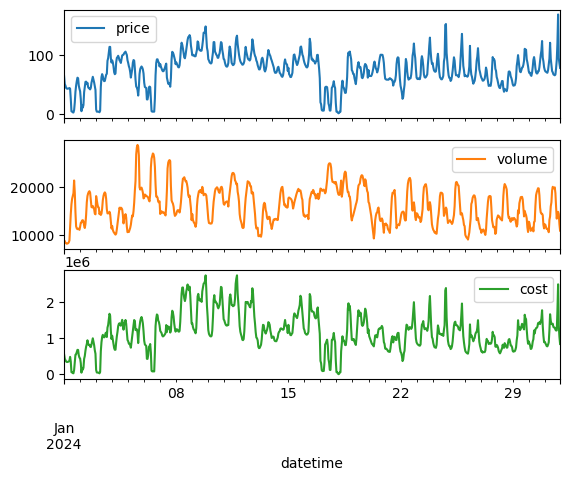

In [9]:
import matplotlib.pyplot as plt

df.plot.line(subplots=True)
plt.savefig('output/price_volume.png')

### Cumulative area plot

<Axes: xlabel='datetime'>

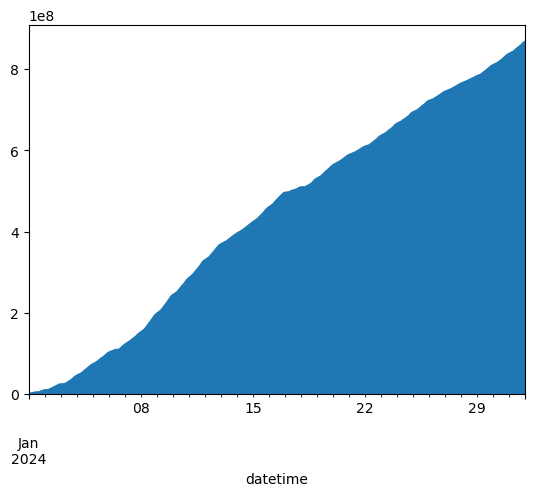

In [10]:
df['cost'].cumsum().plot.area()

In [11]:
df['hour'] = df.index.hour
df['hour_bin'] = pd.cut(
    df['hour'],
    bins=[0,8,16,24],
    labels=['0-8', '8-16', '16-24'],
    right=False
)

df

,price,volume,cost,hour,hour_bin
datetime,,,,,
2024-01-01 00:00:00,63.33,8744.9,553814.517,0,0-8
2024-01-01 01:00:00,50.09,8671.4,434350.426,1,0-8
...,...,...,...,...,...
2024-01-31 22:00:00,85.00,12171.6,1034586.000,22,16-24
2024-01-31 23:00:00,77.52,10826.8,839293.536,23,16-24


In [12]:
df['cost_cum'] = df.groupby('hour_bin', observed=False)['cost'].cumsum()
df

,price,volume,cost,hour,hour_bin,cost_cum
datetime,,,,,,
2024-01-01 00:00:00,63.33,8744.9,553814.517,0,0-8,5.538145e+05
2024-01-01 01:00:00,50.09,8671.4,434350.426,1,0-8,9.881649e+05
...,...,...,...,...,...,...
2024-01-31 22:00:00,85.00,12171.6,1034586.000,22,16-24,3.476984e+08
2024-01-31 23:00:00,77.52,10826.8,839293.536,23,16-24,3.485377e+08


In [13]:
import plotly.express as px

fig = px.area(df, x=df.index, y='cost_cum', facet_col='hour_bin', template='simple_white')
fig

In [14]:
fig.write_image('output/cost_cum.png')